# Chapter 7

## FFT using python

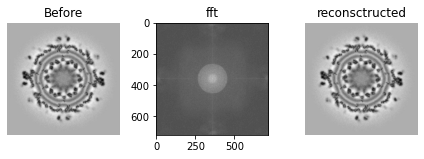

In [24]:
import matplotlib.pyplot as p
import numpy as np
from PIL import Image


img = Image.open('../Figures/fft1.png').convert('L')    

spectrum = np.fft.fftshift(np.fft.fft2(img))

img_back=np.fft.ifft2(np.fft.ifftshift(spectrum))

fig = plt.figure()
ax = fig.add_subplot(1, 3, 1)
imgplot = plt.imshow(img, cmap='gray')
ax.set_title('Before')
plt.axis('off')
ax = fig.add_subplot(1, 3, 2)
p.imshow( np.log(np.abs(spectrum)) , cmap='gray')
ax.set_title('fft')
#plt.axis('off')
ax = fig.add_subplot(1, 3, 3)
p.imshow( np.abs(img_back),cmap='gray')
ax.set_title('reconsctructed')
plt.axis('off')
fig.tight_layout()

## ideal low pass filter

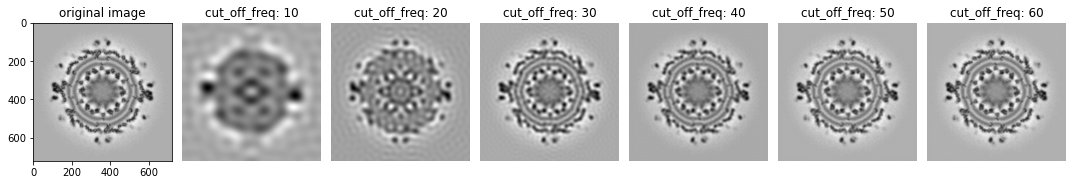

In [30]:
import cv2
import numpy, math
import scipy.fftpack as fftim   
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('L') 
# Performing FFT.
c = fftim.fft2(b)  
# Shifting the Fourier frequency image.
d = fftim.fftshift(c) 


def low_pass(d, cut_off_freq):
    # Intializing variables for convolution function.
    M = d.shape[0]
    N = d.shape[1]  
    # H is defined and 
    # values in H are initialized to 1.
    H = numpy.ones((M,N)) 
    center1 = M/2
    center2 = N/2
    d_0 = cut_off_freq # cut-off radius
    # Defining the convolution function for ILPF.
    for i in range(1,M):
        for j in range(1,N):
            r1 = (i-center1)**2+(j-center2)**2
            # Euclidean distance from 
            # origin is computed.
            r = math.sqrt(r1) 
            # Using cut-off radius to eliminate 
            # high frequency.
            if r > d_0:
                H[i,j] = 0.0
    # Converting H to an image.
    H =  Image.fromarray(H) 
    # Performing the convolution.
    con = d * H 
    # Computing the magnitude of the inverse FFT.
    e = abs(fftim.ifft2(con)) 
    return e
# Saving e as ilowpass_output.png in
# Figures folder .




rows = 1
cols = 7
axes=[]
fig=plt.figure(figsize=(15, 15))
for i in range(rows*cols):
    if i == 0:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("original image")
        axes[-1].set_title(subplot_title)  
        plt.imshow(b,cmap='gray')
    else:
        img2 = low_pass(d,10*i)
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("cut_off_freq: " +str(10*i))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img2,cmap='gray')
        plt.axis("off")
fig.tight_layout()    
plt.show()


## when the cut off frequency increase, the high frequency part of image will make the filtered image more similar to the original image

## butterworth low pass filter

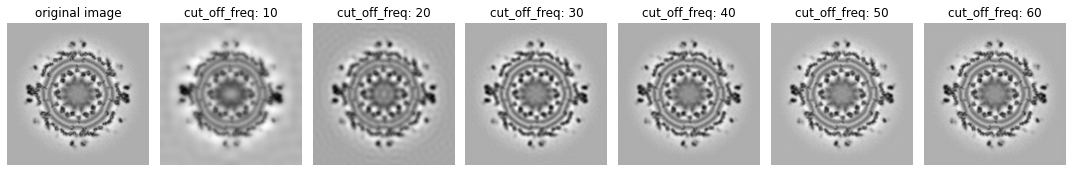

In [44]:
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('L')
 # Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)



def low_pass(d,cut_off,order):
    # Intializing variables for convolution function.
    M = d.shape[0]
    N = d.shape[1]
    # H is defined and
    # values in H are initialized to 1.
    H = numpy.ones((M,N))
    center1 = M/2
    center2 = N/2
    d_0 = cut_off # cut-off radius
    t1 = order # the order of BLPF
    t2 = 2*t1

    # Defining the convolution function for BLPF.
    for i in range(1,M):
        for j in range(1,N):
            r1 = (i-center1)**2+(j-center2)**2
            # Euclidean distance from
            # origin is computed.
            r = math.sqrt(r1)
            # Using cut-off radius to
            # eliminate high frequency.
            if r > d_0:
                H[i,j] = 1/(1 + (r/d_0)**t1)

    # Converting H to an image
    H = Image.fromarray(H)
    # Performing the convolution.
    con = d * H
    # Computing the magnitude of the inverse FFT.
    e = abs(fftim.ifft2(con))
    return e

rows = 1
cols = 7
axes=[]
fig=plt.figure(figsize=(15, 15))
for i in range(rows*cols):
    if i == 0:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("original image")
        axes[-1].set_title(subplot_title)  
        plt.imshow(b,cmap='gray')
        plt.axis("off")
    else:
        img2 = low_pass(d,10*i,1)
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("cut_off_freq: " +str(10*i))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img2,cmap='gray')
        plt.axis("off")
fig.tight_layout()    
plt.show()

## compare to ideal filter, the butterworth shows the less spaghetti effect

## Gaussian low pass filter

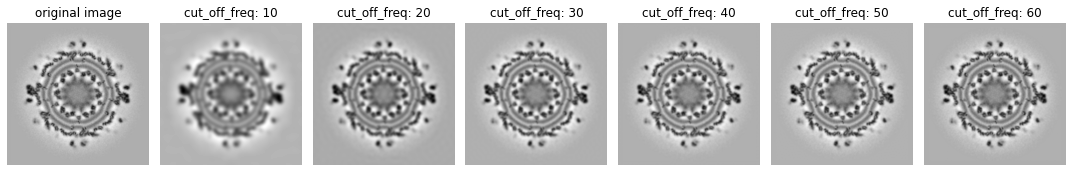

In [41]:
import numpy, math  
import cv2
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('L') 
# Performing FFT.
c = fftim.fft2(b)  
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)



def low_pass(d, cut_off):
    # Intializing variables for convolution function.
    M = d.shape[0]
    N = d.shape[1]
    # H is defined and 
    # values in H are initialized to 1.
    H = numpy.ones((M,N)) 
    center1 = M/2  
    center2 = N/2
    d_0 = cut_off # cut-off radius
    t1 = 2*d_0    
    # Defining the convolution function for GLPF
    for i in range(1,M):
        for j in range(1,N):
            r1 = (i-center1)**2+(j-center2)**2
            # euclidean distance from 
            # origin is computed
            r = math.sqrt(r1) 
            # using cut-off radius to 
            # eliminate high frequency 
            if r > d_0:
                H[i,j] = math.exp(-r**2/t1**2)

    # Converting H to an image.
    H =  Image.fromarray(H)    
    # Performing the convolution.
    con = d * H 
    # Computing the magnitude of the inverse FFT.
    e = abs(fftim.ifft2(con)) 
    return e
    # Saving the image as glowpass_output.png in
    # Figures folder .

rows = 1
cols = 7
axes=[]
fig=plt.figure(figsize=(15, 15))
for i in range(rows*cols):
    if i == 0:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("original image")
        axes[-1].set_title(subplot_title)  
        plt.imshow(b,cmap='gray')
        plt.axis("off")
    else:
        img2 = low_pass(d,10*i)
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("cut_off_freq: " +str(10*i))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img2,cmap='gray')
        plt.axis("off")
fig.tight_layout()    
plt.show()






## when the cut off frequency increase, the edge of the image will be more clear

## ideal high pass filter

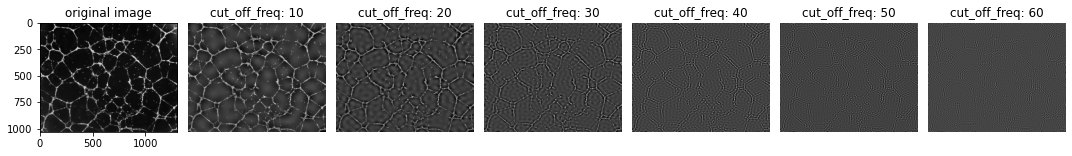

In [43]:
import cv2
import numpy, math
import scipy.fftpack as fftim   
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('../Figures/endothelium.png').convert('L') 
# Performing FFT.
c = fftim.fft2(b)  
# Shifting the Fourier frequency image.
d = fftim.fftshift(c) 


def low_pass(d, cut_off_freq):
    # Intializing variables for convolution function.
    M = d.shape[0]
    N = d.shape[1]  
    # H is defined and 
    # values in H are initialized to 1.
    H = numpy.ones((M,N)) 
    center1 = M/2
    center2 = N/2
    d_0 = cut_off_freq # cut-off radius
    # Defining the convolution function for ILPF.
    for i in range(1,M):
        for j in range(1,N):
            r1 = (i-center1)**2+(j-center2)**2
            # Euclidean distance from 
            # origin is computed.
            r = math.sqrt(r1) 
            # Using cut-off radius to eliminate 
            # high frequency.
            if 0 < r < d_0:
                H[i,j] = 0.0
    # Converting H to an image.
    H =  Image.fromarray(H) 
    # Performing the convolution.
    con = d * H 
    # Computing the magnitude of the inverse FFT.
    e = abs(fftim.ifft2(con)) 
    return e
# Saving e as ilowpass_output.png in
# Figures folder .




rows = 1
cols = 7
axes=[]
fig=plt.figure(figsize=(15, 15))
for i in range(rows*cols):
    if i == 0:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("original image")
        axes[-1].set_title(subplot_title)  
        plt.imshow(b,cmap='gray')
    else:
        img2 = low_pass(d,10*i)
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("cut_off_freq: " +str(10*i))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img2,cmap='gray')
        plt.axis("off")
fig.tight_layout()    
plt.show()


## when the cut off frequency increase, only the high frequency component reside in the image, only the edge will be shows on the image if the cut off frequency increase

## ideal butterworth highpass filter

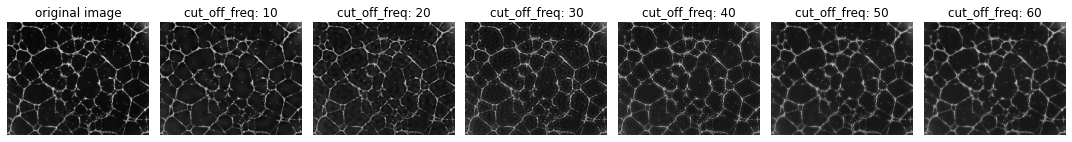

In [48]:
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('../Figures/endothelium.png').convert('L')
 # Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)



def low_pass(d,cut_off,order):
    # Intializing variables for convolution function.
    M = d.shape[0]
    N = d.shape[1]
    # H is defined and
    # values in H are initialized to 1.
    H = numpy.ones((M,N))
    center1 = M/2
    center2 = N/2
    d_0 = cut_off # cut-off radius
    t1 = order # the order of BLPF
    t2 = 2*t1

    # Defining the convolution function for BLPF.
    for i in range(1,M):
        for j in range(1,N):
            r1 = (i-center1)**2+(j-center2)**2
            # Euclidean distance from
            # origin is computed.
            r = math.sqrt(r1)
            # Using cut-off radius to
            # eliminate high frequency.
            if 0 < r < d_0:   
                H[i,j] = 1/(1 + (r/d_0)**t2) 

    # Converting H to an image
    H = Image.fromarray(H)
    # Performing the convolution.
    con = d * H
    # Computing the magnitude of the inverse FFT.
    e = abs(fftim.ifft2(con))
    return e

rows = 1
cols = 7
axes=[]
fig=plt.figure(figsize=(15, 15))
for i in range(rows*cols):
    if i == 0:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("original image")
        axes[-1].set_title(subplot_title)  
        plt.imshow(b,cmap='gray')
        plt.axis("off")
    else:
        img2 = low_pass(d,10*i,1)
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("cut_off_freq: " +str(10*i))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img2,cmap='gray')
        plt.axis("off")
fig.tight_layout()    
plt.show()

## when the cut off frequency increase, the spaghetti effect will be increase

## ideal gaussian high pass filter

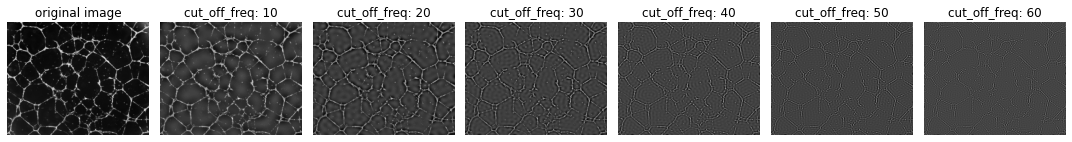

In [49]:
import numpy, math  
import cv2
import scipy.fftpack as fftim
from PIL import Image
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('../Figures/endothelium.png').convert('L') 
# Performing FFT.
c = fftim.fft2(b)  
# Shifting the Fourier frequency image.
d = fftim.fftshift(c)



def low_pass(d, cut_off):
    # Intializing variables for convolution function.
    M = d.shape[0]
    N = d.shape[1]
    # H is defined and 
    # values in H are initialized to 1.
    H = numpy.ones((M,N)) 
    center1 = M/2  
    center2 = N/2
    d_0 = cut_off # cut-off radius
    t1 = 2*d_0    
    # Defining the convolution function for GLPF
    for i in range(1,M):
        for j in range(1,N):
            r1 = (i-center1)**2+(j-center2)**2
            # euclidean distance from 
            # origin is computed
            r = math.sqrt(r1) 
            # using cut-off radius to 
            # eliminate high frequency 
            if 0 < r < d_0:
                H[i,j] = 1 - math.exp(-r**2/t1**2)

    # Converting H to an image.
    H =  Image.fromarray(H)    
    # Performing the convolution.
    con = d * H 
    # Computing the magnitude of the inverse FFT.
    e = abs(fftim.ifft2(con)) 
    return e
    # Saving the image as glowpass_output.png in
    # Figures folder .

rows = 1
cols = 7
axes=[]
fig=plt.figure(figsize=(15, 15))
for i in range(rows*cols):
    if i == 0:
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("original image")
        axes[-1].set_title(subplot_title)  
        plt.imshow(b,cmap='gray')
        plt.axis("off")
    else:
        img2 = low_pass(d,10*i)
        axes.append( fig.add_subplot(rows, cols, i+1) )
        subplot_title=("cut_off_freq: " +str(10*i))
        axes[-1].set_title(subplot_title)  
        plt.imshow(img2,cmap='gray')
        plt.axis("off")
fig.tight_layout()    
plt.show()

## when the cut off increase only the edge will be reside, but with less spaghetti effect compare to the ideal high pass filter

## bandpass filter

Text(0.5, 1.0, 'After')

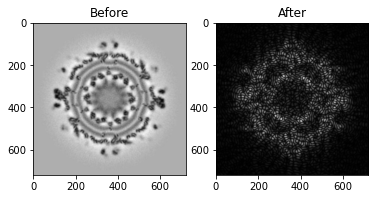

In [50]:
import scipy.misc
import numpy, math
import scipy.fftpack as fftim
from PIL import Image
import cv2
import matplotlib.pyplot as plt

# Opening the image and converting it to grayscale.
b = Image.open('../Figures/fft1.png').convert('L')
# Performing FFT.
c = fftim.fft2(b)
# Shifting the Fourier frequency image .
d = fftim.fftshift(c)
# Intializing variables for convolution function.
M = d.shape[0]
N = d.shape[1]
# H is defined and
# values in H are initialized to 1.
H = numpy.zeros((M,N))
center1 = M/2
center2 = N/2
d_0 = 30.0 # minimum cut-off radius
d_1 = 50.0 # maximum cut-off radius

# Defining the convolution function for bandpass
for i in range(1,M):
    for j in range(1,N):
        r1 = (i-center1)**2+(j-center2)**2
        # Euclidean distance from
        # origin is computed.
        r = math.sqrt(r1)
        # Using min and max cut-off to create
		# the band or annulus.
        if r > d_0 and r < d_1:
            H[i,j] = 1.0

# Converting H to an image.
H = Image.fromarray(H)
# Performing the convolution.
con = d * H
# Computing the magnitude of the inverse FFT.
e = abs(fftim.ifft2(con))
# Saving the image as ibandpass_output.png.
fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
imgplot = plt.imshow(b, cmap='gray')
ax.set_title('Before')
ax = fig.add_subplot(1, 2, 2)
imgplot = plt.imshow(e, cmap='gray')
ax.set_title('After')